## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [188]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
%matplotlib inline 
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42) 

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df_main = pd.read_csv('ab_data.csv') 

In [3]:
df_main.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

> Unique groups

In [4]:
df_main.group.unique().tolist()

['control', 'treatment']

> Unique landing pages

In [5]:
df_main.landing_page.unique().tolist()

['old_page', 'new_page']

> Unique conversion values

In [6]:
df_main.converted.unique().tolist()

[0, 1]

b. Use the cell below to find the number of rows in the dataset.

In [7]:
print(f'Number of Rows: {df_main.shape[0]}')

Number of Rows: 294478


c. The number of unique users in the dataset.

In [8]:
unique_users = df_main.user_id.nunique()
print(f'Number of uique users: {unique_users}')

Number of uique users: 290584


d. The proportion of users converted.

> The conversion columns contains just 1 & 0's , we just find the average of the converted column to get the proportion 

In [9]:
conversion_prop = df_main.converted.mean()
f'Conversion of Propoortion: {conversion_prop}'  

'Conversion of Propoortion: 0.11965919355605512'

e. The number of times the `new_page` and `treatment` don't match.

> control mismatch

In [10]:
cr_unmatched = df_main.query('landing_page == "old_page" and group != "control"')

> treatment mismatch

In [13]:
tm_unmatched = df_main.query('landing_page == "new_page" and group != "treatment"')

> total of mismatched columns

In [17]:
mismatch = tm_unmatched.shape[0] + cr_unmatched.shape[0]
f'Total of mismatched column is {mismatch}'

'Total of mismatched column is 3893'

.

f. Do any of the rows have missing values?

In [21]:
missing_val = df_main.isnull().any().all()
f'Any of the rows have missing values: {missing_val}'

'Any of the rows have missing values: False'

.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

>  We would be dropping rows where there is a mismatch

In [24]:
df_2=df_main.drop(tm_unmatched.index)

In [26]:
df_2= df_2.drop(cr_unmatched.index)

In [27]:
# Double Check all of the correct rows were removed - this should be 0
df_2[((df_2['group'] == 'treatment') == (df_2['landing_page'] == 'new_page')) == False].shape[0]

0

> There are no mismatched columns

`3.` Use **df_2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df_2**?

In [28]:
unq_usrs = df_2.user_id.nunique()
f'Number of unique users: {unq_usrs}'

'Number of unique users: 290584'

b. There is one **user_id** repeated in **df_2**.  What is it?

In [92]:
duplicate_usr = df_2[df_2.user_id.duplicated() == True]
duplicate_usr

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

In [94]:
duplicate_usr_id = int(duplicate_usr.loc[:, 'user_id'].values)
f' user with id {duplicate_usr_id} was duplicated'

' user with id 773192 was duplicated'

.

c. What is the row information for the repeat **user_id**? 

In [99]:
print('Info of Repeated User:\n')
duplicate_usr

Info of Repeated User:



user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [101]:
# use the index number to drop the rows
df_2.drop(2893, axis=0, inplace=True) 

`4.` Use **df_2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [108]:
# we can just find the mean since conversion values are 0 and 1
conv_prob = (df_2.converted).mean()

In [110]:
conv_prob

0.11959708724499628

In [109]:
f'Probabality of conversion regardless of page:  {conv_prob} '

'Probabality of conversion regardless of page:  0.11959708724499628 '

b. Given that an individual was in the `control` group, what is the probability they converted?

> 1. query converted users in the control group 

In [115]:
ctrl_conv = df_2.query('group =="control"') 

> find the conversion mean

In [116]:
ctrl_conv = ctrl_conv.converted.mean() 
ctrl_conv

0.1203863045004612

In [117]:
f' Given that an individual was in the control group the conversion rate is : {ctrl_conv}' 

' Given that an individual was in the control group the conversion rate is : 0.1203863045004612'

.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

> Query converted users in the treatment group

In [125]:
trtmnt_conv = df_2.query('group == "treatment"')

>  find treatment conversion mean

In [126]:
trtmnt_conv = trtmnt_conv.converted.mean()
trtmnt_conv

0.11880806551510564

In [127]:
f' Given that an individual was in the treatment group,the conversio rate is: {trtmnt_conv}'

' Given that an individual was in the treatment group,the conversio rate is: 0.11880806551510564'

d. What is the probability that an individual received the new page?

In [134]:
new_prob = (df_2['landing_page'] == 'new_page').mean()

In [136]:
f' probability that an individual received the new page is {new_prob}' 

' probability that an individual received the new page is 0.5000619442226688'

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> ### ANswer

**From the probability results  the difference in conversion rate of users in each group is minute. while conversion given the new page is arounfd 50%.**

**From these statitisce we cannt justify the claim that  or assert hat there is enouh evidence that the new tretment page leads to more conversion**

<!-- ***We need to form an hypothesi,s perform sampling  to achieve normal distribution for a null hypothesis and test it's statistical significance.
Hence There is no concrete evidence to state that the new treatment page leads to more conversions until we carry out an hypotheis test** -->

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

#### `Formming an hypothesis`

> Type 1 error rate is committed where  new page is better than the old page; this forms the alternative hypotheiss

> Therefore  the null hypotheis would be the reverse where old page is better or eaqual to the new page

> Our hypotheis would therefore be:

$$h_o: p_{new} - p_{old}  <= 0 $$  Null Hypothesis

$$h_1: p_{new} - p_{old} >0 $$   ALt. Hypothesis
$$\alpha =0.05$$  Type 1 Error Rate

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [138]:
sample = df_2.sample(df_2.shape[0], replace=True)
sample_mean = sample.converted.mean() 

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [139]:
p_new = sample_mean
p_new 

0.1187539575475594

In [145]:
f'conversion rate for P𝑛𝑒𝑤  under the null is {p_new}'

'conversion rate for P𝑛𝑒𝑤  under the null is 0.1187539575475594'

b. What is the **conversion rate** for $p_{old}$  under the null? <br><br>

In [148]:
p_old = sample_mean
p_old

0.1187539575475594

In [149]:
f'conversion rate for P𝑜𝑙𝑑  under the null is {p_old}'

'conversion rate for P𝑜𝑙𝑑  under the null is 0.1187539575475594'

c. What is $n_{new}$, the number of individuals in the treatment group?

> Note: Our Treatment group is well matched with the new page and vice versa for the control group and old apge
    
> Hence we can use group or page interchangeable for our queries

In [160]:
n_new = df_2.query('landing_page == "new_page"').user_id.nunique()
n_new

145310

In [162]:
f' the number of individuals in the treatment group = {n_new}'

' the number of individuals in the treatment group = 145310'

d. What is $n_{old}$, the number of individuals in the control group?

In [163]:
n_old = df_2.query('landing_page == "old_page"').user_id.nunique()
n_old

145274

In [165]:
 f' the number of individuals in the control group = {n_old}'

' the number of individuals in the control group = 145274'

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

<!--  def sim_new():
        new_page_converted = 
     return new_page_converted -->

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

### Interpretation
> Use numpy random.choice function to generate loaded values of 1 & 0's (as in a lodaded coin) based on null hypotheis

In [181]:
simul_new_vals= np.random.choice([0,1], p=[1-p_new , p_new], size= n_new)

In [182]:
simul_old_vals= np.random.choice([0,1], p=[1-p_old , p_old], size= n_old)

<!-- # def simulate_old():
     old_page_converted = np.random.choice([0,1], p=[1-p_old , p_old], size=n_old,)
     return old_page_converted -->

g. Find $p_{new} - p_{old}$ for your simulated values from part (e) and (f).

In [183]:
p_new = simul_new_vals.mean()
p_new

0.11659211341270387

In [184]:
p_old = simul_old_vals.mean()
p_old

0.11731624378760136

In [185]:
diff_prob = p_new -p_old

In [216]:
f'Difference in simulated values: = {diff_prob}'

'Difference in simulated values: = -0.0007241303748974914'

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**

> We would be using the numpy binomial funtion to generate a random values for P_new and  P_old that are normally distibuted

<!-- p_diffs = []
for _ in range(10000):
    p_diffs.append(simulate_new().mean() - simulate_old().mean())
p_diffs = np.array(p_diffs)  -->

In [212]:
p_new2 = np.random.binomial(n_new, p_new, 10000)/n_new

In [213]:
p_old2 = np.random.binomial(n_old, p_old, 10000)/n_old

In [214]:
# let's take sneak peek at our values
p_diffs = p_new2 - p_old2

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

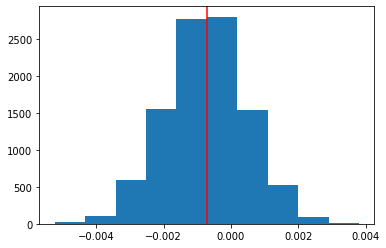

In [218]:
plt.hist(p_diffs)
plt.axvline(diff_prob, color='r')
plt.show()

#### Interpretation:

> The difference of in probabolity figures of our samples falls below the zero tick

> What this is implies is tha the probability oof us getting more conversion from our new page over the old page is less than zero

> This falls in favour of the null hypotheis where new page is better than the old page.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [219]:
df_2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [222]:
old_conv = df_2.query('landing_page == "old_page"').converted.mean()
new_conv = df_2.query('landing_page == "new_page"').converted.mean()

In [223]:
actual_diff = new_conv - old_conv

In [226]:
prop_diffs = (p_diffs > actual_diff).mean()  
prop_diffs

0.7637

In [228]:
f' Proportion of p_diffs greater than the actual difference observed in ab_data.csv = {prop_diffs} '

' Proportion of p_diffs greater than the actual difference observed in ab_data.csv = 0.7637 '

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

##### Answer:
> ##### The value we just computed is called the p-value  which is 76.37%

> ##### The computed p-value which is above 50% makes our null hypothesis statitically significant

> ##### Hence we fail to reject the null hypothesis that the new page does not lead to better conversion than the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [229]:
df_2.head(2)

user_id                   timestamp    group landing_page  converted
0   851104  2017-01-21 22:11:48.556739  control     old_page          0
1   804228  2017-01-12 08:01:45.159739  control     old_page          0

In [235]:
import statsmodels.api as sm

conv_old = df_2.query('group == "control" and converted ==1').user_id.count()
conv_new = df_2.query('group == "treatment" and converted ==1').user_id.count()
n_old =  df_2.query('landing_page == "old_page"').user_id.count()
n_new = df_2.query('landing_page == "new_page"').user_id.count()

In [236]:
conv_old

17489

In [237]:
conv_new

17264

In [238]:
n_old

145274

In [239]:
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [244]:
from statsmodels.stats.proportion import proportions_ztest as pz_test

> Set parameters

In [245]:
counts = np.array([conv_old, conv_new])
nobs = np.array([n_old,n_new]) 

> Calculate Statistics

In [246]:
z_score, p_value =  pz_test(counts, nobs, alternative='smaller')

In [247]:
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

 ### Answer

<!-- **The z-score gives us the value of the standard deviation from the null distribution, while the p-value tells us the probability of getting this value or more extreme if the null is true which apparently is high here .**
 -->
 
 > The z-score shows that we are 1.31 standard deviations from the mean. 

> The p-value is 0.905 and is greater than our alpha of 0.05, This figure agrees with the strenght of the p-value calcualted in the previous question**

> ####  Hence we fail to reject the null hypothesis that the new page does not lead to better conversion than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [260]:
df_2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

> Create copy of datasets for our regression model

In [261]:
df_reg = df_2.copy()

> Create dummy varibles for landing pages

In [262]:
df_reg = df_reg.join(pd.get_dummies(df_2['landing_page']))

In [263]:
df_reg.head(1)

user_id                   timestamp    group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739  control     old_page          0   

   new_page  old_page  
0         0         1

> drop old page as our base page

In [264]:
df_reg2 = df_reg.drop('old_page', axis=1)

In [265]:
df_reg2.head(3)

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   

   new_page  
0         0  
1         0  
2         1

> Instrutcion:
    
    add an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

> the new page would be renamed as ab_page

In [266]:
df_reg2.rename(columns={'new_page':'ab_page'}, inplace=True)

In [268]:
df_reg2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   ab_page  
0        0  
1        0  
2        1  
3        1  
4        0

> Add intercept value

In [270]:
df_reg2['intercept'] =1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [271]:
response = df_reg2['converted'] 
predictors = df_reg2[['intercept', 'ab_page']] 

In [272]:
model1 = sm.Logit(response, predictors)
model1_result = model1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [274]:
model1_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-06-10 13:19 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### Answer

>part III p-value = 0.1899

>Part II p-value = 0.995

### Comparison

> In part ii, the p-value is used to test if the null hypothesis is true or not i.e if the new page does not yield better conversion rate than the old page


> Here in part III, the p-value of  ab_page is used to test if either of the landing pages (old/new) is suited as a predictor for determining conversion

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer

> Adding more factors as independent variables to our model can further enhance the predictive beahviour of our model and help us identify factors that truly affect the predicitive strenght of our model compared to others

> The negative impact of multiple independent variables in a single model is mulitcolinearity whereby independent varibles impact each other outcomes, and this can affect the predictive accuracy of our model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

> Load datasets

In [275]:
countries = pd.read_csv('countries.csv')

In [276]:
countries.head(2)

user_id country
0   834778      UK
1   928468      US

In [277]:
df_merge = df_reg2.merge(countries, on='user_id', how='inner')

In [278]:
df_merge.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   ab_page  intercept country  
0        0          1      US  
1        0          1      US  
2        1          1      US  
3        1          1      US  
4        0          1      US

In [279]:
df_merge.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

> Create dummy variables

In [280]:
df_merge = df_merge.join(pd.get_dummies(df_merge.country))

In [281]:
df_merge.head(1)

user_id                   timestamp    group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739  control     old_page          0   

   ab_page  intercept country  CA  UK  US  
0        0          1      US   0   0   1

In [282]:
#drop country column
df_merge.drop('country', axis=1, inplace=True)

In [283]:
df_merge.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   ab_page  intercept  CA  UK  US  
0        0          1   0   0   1  
1        0          1   0   0   1  
2        1          1   0   0   1  
3        1          1   0   0   1  
4        0          1   0   0   1

> `NB:` Take 'CA' as baseline for country

In [284]:
df_merge['intercept'] =1

> define logistic regression prooperties

In [285]:
response = df_merge['converted']
predictors = df_merge[['intercept','ab_page','UK','US']]

> Compute model

In [286]:
model2 = sm.Logit(response, predictors)
model2_result = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [287]:
model2_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-06-10 13:53 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

> ### Interpretation

> Given the new page as basis of our prediction , we can obseerve from our model that both page variable and country variable are not adequate predictos of a user converion

> Hence we can say that given the new page, the null hypothesis that new page is no more better than old page in converison rate is true

<!-- ### Further actions -->

<!-- **I would be creating interaction to between page and country to further observe if these independent variables  would offer statistical significance ias predictors of  conversion given the nes page** -->

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

>  create interactions for each predictor country and ab_page

In [289]:
df_merge['ab_US'] = df_merge.ab_page * df_merge.US
df_merge['ab_UK'] = df_merge.ab_page * df_merge.UK

> Define proopertie of model

In [290]:
response = df_merge['converted']
predictors = df_merge[['intercept','ab_US','ab_UK', 'ab_page', 'US', 'UK']]

> COmpute model

In [292]:
model3 = sm.Logit(response, predictors)
model3_result = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [294]:
model3_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-06-10 14:04 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
==================================================================

"""

In [295]:
response = df_merge['converted']
predictors = df_merge[['intercept', 'ab_US','ab_UK']]

In [296]:
model4 = sm.Logit(response, predictors)
model4_result = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [297]:
model4_result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-06-10 14:06 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
==================================================================

"""

> ### Conclusion

> From the interaction models computed above, we can observe that none of the independent variables (country or page) is  a good enough predictor for converison given the new page

> From the various statistical computations above, we can conclude that the old page is better than the new page

<!-- <a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! -->

> Create html copy

In [298]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255